![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [133]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


### Understand the data

In [134]:
RANDOM_STATE = 42

In [135]:
penguins_df.shape

(332, 5)

In [136]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [137]:
penguins_df.duplicated().sum()

0

In [138]:
penguins_df.nunique()

culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

In [139]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [140]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [141]:
penguins_df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.220570,0.654967,0.593396
culmen_depth_mm,-0.220570,1.000000,-0.580062,-0.476386
flipper_length_mm,0.654967,-0.580062,1.000000,0.873267
body_mass_g,0.593396,-0.476386,0.873267,1.000000


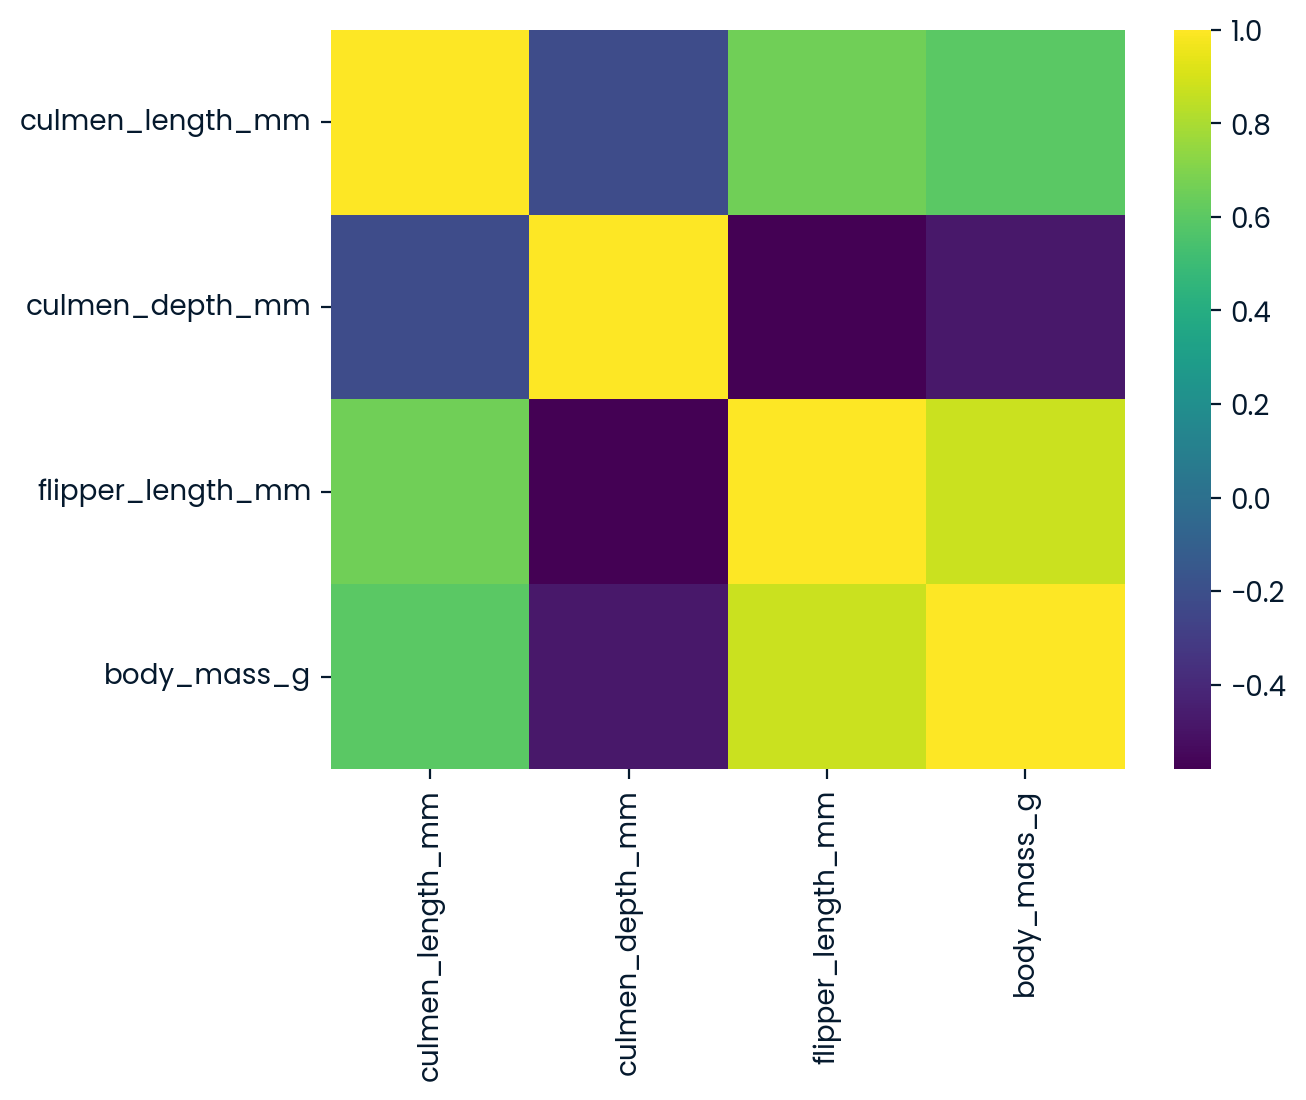

In [142]:
sns.heatmap(penguins_df.corr(numeric_only=True), cmap="viridis")
plt.show()

### Preprocessing

In [143]:
# Encode categorical feature, sex, to numerical
encoded_df = pd.get_dummies(penguins_df, drop_first=True)
encoded_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [144]:
# Scale all values
scaler = StandardScaler()
scaled_df = scaler.fit_transform(encoded_df)
scaled_df

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768, -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  0.99399394]])

### Model Training

In [145]:
# Train model on different number of clusters
# Determine each model's inertia to quantify results
X = scaled_df
TOTAL_N_CLUSTERS = 15
inertias = []

for n_clusters in range(1, TOTAL_N_CLUSTERS):
    model = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    model.fit(X)
    inertias.append(model.inertia_)
print(inertias[:5])

[1659.9999999999995, 881.8305702961084, 576.2691239087537, 383.46432033536416, 282.84171477880295]


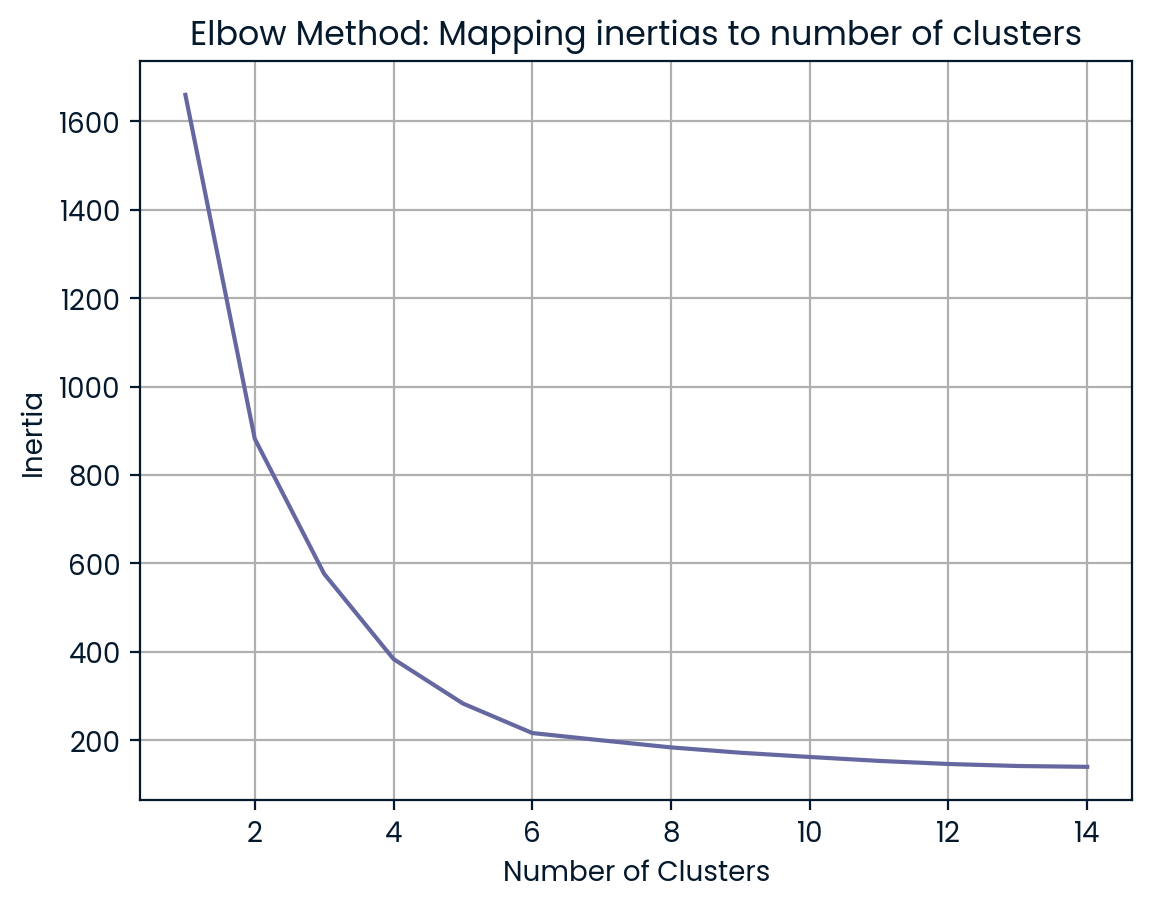

In [146]:
n_clusters = range(1, TOTAL_N_CLUSTERS)
sns.lineplot(x=n_clusters, y=inertias)
plt.title("Elbow Method: Mapping inertias to number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

#### Based on the elbow method graph, 6 seems  to be the best number of clusters

In [147]:
# Train and predict once more using the appropriate number of clusters
X = scaled_df
model = KMeans(n_clusters=6, random_state=RANDOM_STATE)
clusters = model.fit_predict(X)
clusters[:5]

array([3, 1, 1, 1, 3], dtype=int32)

### Presenting Results

In [148]:
df = penguins_df.copy()
df["clusters"] = clusters
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,clusters
0,39.1,18.7,181.0,3750.0,MALE,3
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
3,36.7,19.3,193.0,3450.0,FEMALE,1
4,39.3,20.6,190.0,3650.0,MALE,3


In [149]:
grouped_df = df.groupby(clusters).mean()
grouped_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,clusters
0,50.624324,19.270270,199.945946,3953.378378,0.0
1,37.580769,17.575641,187.666667,3363.141026,1.0
2,45.563793,14.237931,212.706897,4679.741379,2.0
3,40.260870,19.026087,191.985507,4035.144928,3.0
4,49.473770,15.718033,221.540984,5484.836066,4.0
5,47.310345,17.706897,192.758621,3569.827586,5.0


In [150]:
stat_penguins = grouped_df.drop("clusters", axis=1)
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,50.624324,19.270270,199.945946,3953.378378
1,37.580769,17.575641,187.666667,3363.141026
2,45.563793,14.237931,212.706897,4679.741379
3,40.260870,19.026087,191.985507,4035.144928
4,49.473770,15.718033,221.540984,5484.836066
5,47.310345,17.706897,192.758621,3569.827586
